In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 데이터 불러오기 및 확인
df = pd.read_csv("C:/datasets/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# 칼럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

---

In [6]:
# 명목형 변수 → dummy variable

df2 = pd.get_dummies(df, columns = ["HeartDisease", "Smoking",
                                    "AlcoholDrinking", "Stroke",
                                    "DiffWalking", "Sex",
                                    "AgeCategory", "Race",
                                    "Diabetic", "PhysicalActivity",
                                    "GenHealth", "Asthma",
                                    "KidneyDisease", "SkinCancer"], drop_first = True)
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


*drop_first = True*  
다중공선성 예방을 위한 하나의 가변수 범주 제거 옵션

In [8]:
# 숫자형 변수 분리

df_num = df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]
df_nom = df2.drop(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)

# 표준화 (RobustScaling)
RobustScaler = RobustScaler()
df_robust = RobustScaler.fit_transform(df_num)

# 칼럼명 결합
df_num2 = pd.DataFrame(data=df_robust, columns=df_num.columns)

In [9]:
# 명목형 + 숫자형
df3 = pd.concat([df_num2, df_nom], axis=1)
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


---

In [13]:
# 독립변수 ↔ 종속변수
X = df3.drop(["HeartDisease_Yes"], axis=1)
y = df3[['HeartDisease_Yes']]

In [14]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print('train data 개수 : ', len(X_train))
print('test data 개수 : ', len(X_test))

train data 개수 :  239846
test data 개수 :  79949


---

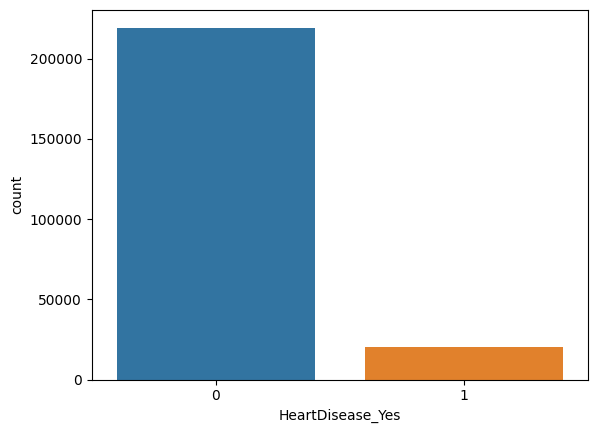

In [15]:
# 시각화
sns.countplot(x="HeartDisease_Yes", data=y_train)
plt.show()

1값의 10% 미만이므로 *클래스 불균형* 이 심함 → **언더샘플링** or **오버샘플링**

In [17]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

# 임시 변수명 적용 ← 언더샘플링, 오버샘플링 적용 시 오류 방지
X_temp_name = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
              'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
              'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
              'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
150901,1.476319,0.0,0.0,0.5,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
164527,-0.248985,15.0,10.0,-2.0,1,0,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0
260971,0.805142,0.0,0.0,0.0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
262287,0.612991,5.0,0.0,0.0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [18]:
## 언더샘플링

X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train_re, y_train_re)

print("RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트 : ", X_train_re.shape, y_train_re.shape)
print("RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트 : ", X_train_under.shape, y_train_under.shape)
print("RandomUnderSampler 적용 전 레이블 값 분포 : \n", pd.Series(y_train_re['y1']).value_counts())
print("RandomUnderSampler 적용 후 레이블 값 분포 : \n", pd.Series(y_train_under['y1']).value_counts())


RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트 :  (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트 :  (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포 : 
 0    219328
1     20518
Name: y1, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포 : 
 0    20518
1    20518
Name: y1, dtype: int64


In [19]:
# 언더샘플링 완료 후 칼럼명 복구
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.572395,0.0,1.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,2.365359,6.0,0.333333,-0.5,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
2,-0.964817,0.0,2.666667,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
3,-1.246279,0.0,0.000000,-0.5,1,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0.668471,15.0,0.000000,0.5,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0


---

In [23]:
# sklearn
model = LogisticRegression()
model.fit(X_train_under, y_train_under)

print("학습셋 모델 정확도 : ", model.score(X_train_under, y_train_under))
print("테스트셋 모델 정확도 : ", model.score(X_test, y_test))

학습셋 모델 정확도 :  0.7645482015791013
테스트셋 모델 정확도 :  0.7501282067317915


과대적합, 과소적합 X

---

In [25]:
# statsmodels
# Newton-Raphson Iteration (최적화) 알고리즘을 이용한 로지스틱 모델 학습

model2 = sm.Logit(y_train_under, X_train_under)
results = model2.fit(method = 'newton')

results.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Fri, 31 Mar 2023   Pseudo R-squ.:                     inf
Time:                        03:47:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

In [26]:
# 독립변수의 오즈비 확인
np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black